In [32]:
from qiskit import QuantumCircuit 
from qiskit.quantum_info import Statevector#data only
def oracle_gate(f_type):
    oracle =  QuantumCircuit(2)
    if f_type =="constant1":
        oracle.x(1)
    elif(f_type =="balanced"):
        oracle.cx(0,1)
    oracle_gg= oracle.to_gate(label="oracle")

    qc = QuantumCircuit(2)
    qc.x(1)
    qc.h([0,1])
    qc.append(oracle_gg, [0,1])
    qc.h(0)
    sv = Statevector.from_instruction(qc)
    return qc, sv




In [33]:
qc, sv = oracle_gate("constant1")
print(sv)

Statevector([-0.70710678+0.j,  0.        +0.j,  0.70710678+0.j,
              0.        +0.j],
            dims=(2, 2))


In [39]:
qc.measure_all() 
print(qc.draw())

        ┌───┐     ┌─────────┐┌───┐ ░ ┌─┐   
   q_0: ┤ H ├─────┤0        ├┤ H ├─░─┤M├───
        ├───┤┌───┐│  oracle │└───┘ ░ └╥┘┌─┐
   q_1: ┤ X ├┤ H ├┤1        ├──────░──╫─┤M├
        └───┘└───┘└─────────┘      ░  ║ └╥┘
meas: 2/══════════════════════════════╩══╩═
                                      0  1 


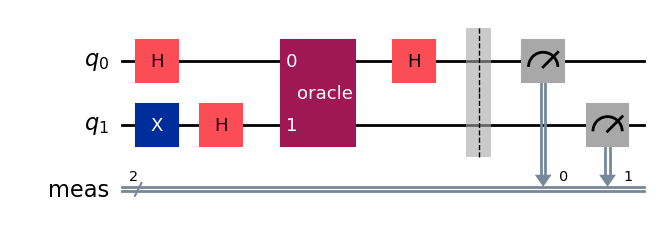

In [41]:
qc.draw("mpl")